In [21]:
%tensorflow_version 1.x
import tensorflow as tf  
hello = tf.constant('Hello, Tensorflow')  
sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow'




---


1、导入 numpy 库  \
2、建立一个一维数组 a，初始化为[4,5,6]  \
(1) 输出 a 的类型（type）  \
(2) 输出 a 的各维度大小（shape） \
(3) 输出 a 的第一个元素\

In [22]:
import numpy as np
a=np.array([4,5,6])
print(type(a))
print(a.shape)
print(a[0])

<class 'numpy.ndarray'>
(3,)
4




---


3、建立一个二维数组 b，初始化为[[4,5,6],[1,2,3]] \
(1) 输出 b 的各维度大小（shape） \
(2) 输出b[0,0],b[0,1],b[1,1]这三个元素 

In [23]:
b=np.array([[4,5,6],[1,2,3]])
print(b.shape)
print(b[0,0],b[0,1],b[1,1])

(2, 3)
4 5 2




---
4、建立矩阵 \
(1) 建立一个大小为3 × 3的全 0 矩阵 c \
(2) 建立一个大小为4 × 5的全 1 矩阵 d \
(3) 建立一个大小为4 × 4的单位矩阵 e 


In [24]:
c=np.zeros((3,3))
d=np.ones((4,5))
e=np.eye(4)
print(c);print(d);print(e)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]




---


5、建立一个数组 f，初始化为[0,1,2,3,4,5,6,7,8,9,10,11]（arange） \
(1) 输出 f 以及 f 的各维度大小 \

In [25]:
f=np.arange(12)
f

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

(2) 将 f 的 shape 改为3 × 4（reshape） 

In [26]:
f=f.reshape(3,4)
f

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

(3) 输出 f 以及 f 的各维度大小 

In [27]:
f.shape

(3, 4)

(4) 输出 f 第二行（f[1,∶]） 

In [28]:
f[1,:]

array([4, 5, 6, 7])

(5) 输出 f 最后两列（f[:,2:]） 

In [29]:
f[:,2:]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

(6) 输出 f 第三行最后一个元素（使用-1 表示最后一个元素） 

In [30]:
f[2,-1]

11



---
二、Tensorflow 练习（提交每个练习的实现步骤描述以及下面要求提交的结果）
 
1、线性回归 \
(1) 生成训练数据


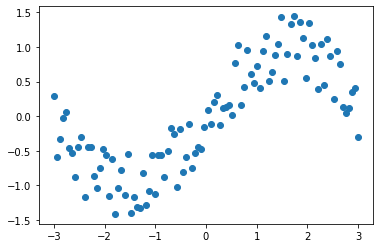

In [31]:
num_observations=100
x=np.linspace(-3,3,num_observations)
y=np.sin(x)+np.random.uniform(-0.5,0.5,num_observations)
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

(2)使用 tensorflow 实现线性回归模型，训练参数𝑤和𝑏。 

In [32]:
n=len(x)

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.01
training_epochs = 1000

In [33]:
# 初始y_pred X*W
y_pred = tf.add(X*W, b) 

  
# loss函数
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# 初始化
init = tf.global_variables_initializer()
print('(3) 输出参数𝑤、𝑏和损失。（提交运行结果） ')
# 训练
with tf.Session() as sess: 
      
    # 初始化
    sess.run(init) 
      
    # epoch训练
    for epoch in range(training_epochs): 
          
        # 随机梯度下降，一个一个feed
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # 显示w b
        if (epoch + 1) % 50 == 0: 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(3) 输出参数𝑤、𝑏和损失。（提交运行结果） 
Epoch 50 : cost = 0.5143953 W = 0.5935373 b = -0.7645738
Epoch 100 : cost = 0.23997615 W = 0.38526684 b = -0.47551134
Epoch 150 : cost = 0.17217466 W = 0.33997333 b = -0.30036998
Epoch 200 : cost = 0.14876172 W = 0.33003342 b = -0.19418705
Epoch 250 : cost = 0.14019178 W = 0.32779777 b = -0.12979871
Epoch 300 : cost = 0.13702145 W = 0.32726234 b = -0.0907505
Epoch 350 : cost = 0.13584204 W = 0.32711577 b = -0.06706932
Epoch 400 : cost = 0.13540003 W = 0.3270646 b = -0.052707434
Epoch 450 : cost = 0.13523243 W = 0.32704246 b = -0.043997485
Epoch 500 : cost = 0.13516775 W = 0.3270312 b = -0.038715076
Epoch 550 : cost = 0.13514212 W = 0.32702398 b = -0.035511367
Epoch 600 : cost = 0.13513155 W = 0.3270197 b = -0.033568557
Epoch 650 : cost = 0.135127 W = 0.32701772 b = -0.032390304
Epoch 700 : cost = 0.1351249 W = 0.32701614 b = -0.03167566
Epoch 750 : cost = 0.1351239 W =

(3) 输出参数𝑤、𝑏和损失。（提交运行结果） \
(4) 画出预测回归曲线以及训练数据散点图，对比回归曲线和散点图并分析原因。
（提交图片及分析） 

Training cost = 0.13512278 Weight = 0.32701126 bias = -0.030629147 



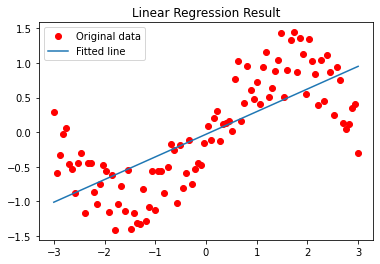

In [34]:
# 预测值
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

# 画图
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

**答：**
从回归曲线和散点图来看，拟合效果不好，其原因在于散点数据本身不是由一个线性函数得到的，散点数据符合非线性关系



---


2、线性回归（使用多项式函数对原始数据进行变换） \
(1) 生成训练数据，数据同上 \
(2) 使用 tensorflow 实现线性回归模型，这里我们假设𝑦是𝑥的 3 次多项式


In [35]:
num_observations=100
x=np.linspace(-3,3,num_observations)
y=np.sin(x)+np.random.uniform(-0.5,0.5,num_observations)

In [36]:
n=len(x)

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W1 = tf.Variable(np.random.randn(), name = "W1") 
W2 = tf.Variable(np.random.randn(), name = "W2")
W3 = tf.Variable(np.random.randn(), name = "W3")
b = tf.Variable(np.random.randn(), name = "b") 

learning_rate = 0.01
training_epochs = 1000

In [37]:
# 初始y_pred 
y_pred = tf.add(W1*X+W2*X**2+W3*X*X**2, b) 

  
# loss函数
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# 初始化
init = tf.global_variables_initializer()
print('(3) 输出参数𝑤、𝑏和损失。（提交运行结果） ')
# 训练
with tf.Session() as sess: 
      
    # 初始化
    sess.run(init) 
      
    # epoch训练
    for epoch in range(training_epochs): 
          
        # 随机梯度下降，一个一个feed
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # 显示w b
        if (epoch + 1) % 50 == 0: 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run([W1,W2,W3]), "b =", sess.run(b)) 

    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run([W1,W2,W3])
    bias = sess.run(b) 

(3) 输出参数𝑤、𝑏和损失。（提交运行结果） 
Epoch 50 : cost = 0.080133505 W = [0.8694852, 0.09120809, -0.09722608] b = -0.5061119
Epoch 100 : cost = 0.066621765 W = [0.8607483, 0.07598354, -0.09534014] b = -0.42715374
Epoch 150 : cost = 0.05782079 W = [0.85421735, 0.06394225, -0.09392096] b = -0.36338887
Epoch 200 : cost = 0.052071217 W = [0.84935343, 0.054233544, -0.09283787] b = -0.3119296
Epoch 250 : cost = 0.048311036 W = [0.845748, 0.046406224, -0.09201265] b = -0.2704062
Epoch 300 : cost = 0.04584833 W = [0.8430924, 0.040095642, -0.091385566] b = -0.23689915
Epoch 350 : cost = 0.04423272 W = [0.8411463, 0.035007823, -0.09090966] b = -0.2098622
Epoch 400 : cost = 0.04317076 W = [0.83973324, 0.03090614, -0.09054963] b = -0.18804795
Epoch 450 : cost = 0.042471003 W = [0.8387156, 0.027599437, -0.090277895] b = -0.17044759
Epoch 500 : cost = 0.042008586 W = [0.83799183, 0.024933731, -0.090073496] b = -0.15624769
Epoch 550 : cost = 0.04170195 W = [0.83748287, 0.022784727, -0.08992007] b = -0.14479145
Epo

Training cost = 0.041090827 Weight = [0.8365793, 0.015133788, -0.08951206] bias = -0.10389968 



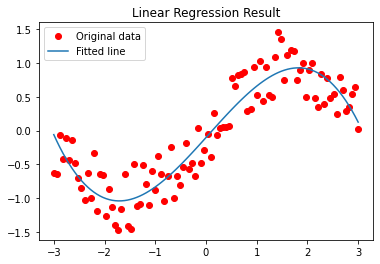

In [38]:
# 预测值
predictions = weight[0]*x+weight[1]*x**2+weight[2]*x*x**2 + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

# 画图
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

**答：**
从回归曲线和散点图来看，拟合效果挺好，其原因在于散点数据符合非线性关系，用二次函数可以拟合出较好的效果



---
3、Softmax 分类 \
(1) 获取 MNIST 数据集，每张图片像素为28 × 28 


In [57]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.5
training_epochs = 2000

# X是一个Placeholder ,这个值后续再放入让TF计算，这里是一个784维，但是训练数量不确定的（用None表示）的浮点值
X = tf.placeholder("float", [None,784 ])
Y = tf.placeholder("float", [None, 10])
# 设置对应的权值和偏置的表示，Variable代表一个变量，会随着程序的生命周期做一个改变
# 需要给一个初始的值，这里都全部表示为0
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_pred = tf.nn.softmax(tf.matmul(X, W) + b)

#交叉熵去衡量 reduce_sum 累加
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_pred), reduction_indices=[1]))
#训练的步骤，告诉tf，用梯度下降法去优化，学习率是0.5，目的是最小化交叉熵
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
# 到目前为止，我们已经定义完了所有的步骤，下面就需要初始化这个训练步骤了，首先初始化所有变量（之前定义的变量）
init = tf.initialize_all_variables()


sess=tf.Session()
      
# 初始化
sess.run(init) 
      
#记录
cost_list=[]
accur_list=[]
best_cost=[]
best_accur=[]
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
temp_bc=1;temp_ba=0
# epoch训练
for epoch in range(training_epochs): 
          

    # 随机梯度下降，一个一个feed
    batch_xs, batch_ys = mnist.train.next_batch(100,shuffle=True)
    sess.run(train_step, feed_dict = {X : batch_xs, Y : batch_ys}) 
    c = sess.run(cross_entropy, feed_dict = {X : batch_xs, Y : batch_ys})
    a = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})   
    cost_list.append(c)
    accur_list.append(a)
    if (temp_bc>c):
      best_cost.append(c)
      temp_bc=c
    else:
      best_cost.append(temp_bc)
    if (temp_ba<a):
      best_accur.append(a)
      temp_ba=a
    else:
      best_accur.append(temp_ba)
    # 显示w b
    if (epoch + 1) % 50 == 0: 
        c = sess.run(cross_entropy, feed_dict = {X : batch_xs, Y : batch_ys}) 
        print("Epoch", (epoch + 1), ": cost =", c, "b =", sess.run(b)) 
    

print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 50 : cost = 0.488661 b = [-0.08365311  0.17071919 -0.01936617 -0.0398109   0.04756831  0.12266015
 -0.03735828  0.10729032 -0.23253372 -0.03551574]
Epoch 100 : cost = 0.28145513 b = [-0.11440752  0.23287612 -0.03404478 -0.09278446  0.05192118  0.25853932
 -0.03208613  0.14459965 -0.38564333 -0.02896999]
Epoch 150 : cost = 0.4099089 b = [-0.13395491  0.2536639  -0.01877126 -0.10980898  0.07138553  0.32393235
 -0.03772432  0.21619423 -0.4951012  -0.06981513]
Epoch 200 : cost = 0.37972486 b = [-0.14302328  0.286344   -0.01859528 -0.11127625  0.06263638  0.41599742
 -0.05539409  0.25708807 -0.6107534  -0.08302315]
Epoch 250 : cost = 0.26081622 b = [-0.15754078  0.2982701  -0.00481044 -0.13929795  0.05569964  0.5119739
 -0.05050829  0.26923695 -0.69256836 -0.09045447]
Epoch 300 : cost = 0.35855



---

(3) 画出训练和测试过程的准确率随迭代次数变化图，画出训练和测试过程的损
失随迭代次数变化图。（提交最终分类精度、分类损失以及两张变化图） 

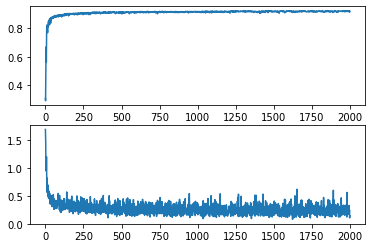

In [58]:
fig,ax=plt.subplots(2,1)
ax[0].plot(range(training_epochs) ,accur_list)
ax[1].plot(range(training_epochs),cost_list)
plt.show()

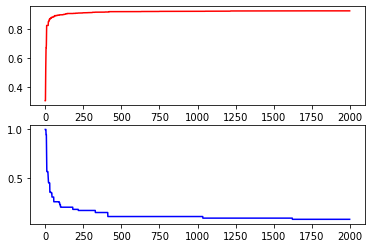

In [59]:
fig,ax=plt.subplots(2,1)
ax[0].plot(best_accur,'r-')
ax[1].plot(best_cost,'b-')